In [1]:
import numpy as np
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
import seaborn
 
 


In [2]:
 #取樣點選擇1400個，因為設定的訊號頻率分量最高為600赫茲，根據取樣定理知取樣頻率要大於訊號頻率2倍，所以這裡設定取樣頻率為1400赫茲（即一秒內有1400個取樣點，一樣意思的）
x=np.linspace(0,1,15000)
print(x)

#設定需要取樣的訊號，頻率分量有180，390和600
y=10*np.sin(2*np.pi*50*x)

yy=fft(y)      #快速傅立葉變換
yreal = yy.real    # 獲取實數部分
yimag = yy.imag    # 獲取虛數部分
print('y',y,'\n')
print('yy',yy,'\n')
print('yreal',yreal,'\n')
print('yimag',yimag,'\n')

[0.00000000e+00 6.66711114e-05 1.33342223e-04 ... 9.99866658e-01
 9.99933329e-01 1.00000000e+00]
y [ 0.00000000e+00  2.09438159e-01  4.18784440e-01 ... -4.18784440e-01
 -2.09438159e-01  1.96438672e-14] 

yy [-2.12807549e-12-0.j          4.19003360e-05-0.20005937j
  1.67802760e-04-0.40059956j ...  3.78313950e-04+0.60210528j
  1.67802760e-04+0.40059956j  4.19003360e-05+0.20005937j] 

yreal [-2.12807549e-12  4.19003360e-05  1.67802760e-04 ...  3.78313950e-04
  1.67802760e-04  4.19003360e-05] 

yimag [-0.         -0.20005937 -0.40059956 ...  0.60210528  0.40059956
  0.20005937] 



In [3]:
yf=abs(fft(y))    # 取絕對值
yf1=2*abs(fft(y/len(x)))   #歸一化處理
yf2 = yf1[range(int(len(x)/2))] #由於對稱性，只取一半區間


In [4]:
xf = np.arange(len(y))  # 頻率
xf1 = xf
xf2 = xf[range(int(len(x)/2))] #取一半區間

In [5]:
maxyf2 = max(yf2)
for i,txt in enumerate(yf2):
    if txt == maxyf2:
        point = i
        break
print(point)
print(xf2[point],yf2[point])

50
50 9.999483843455412


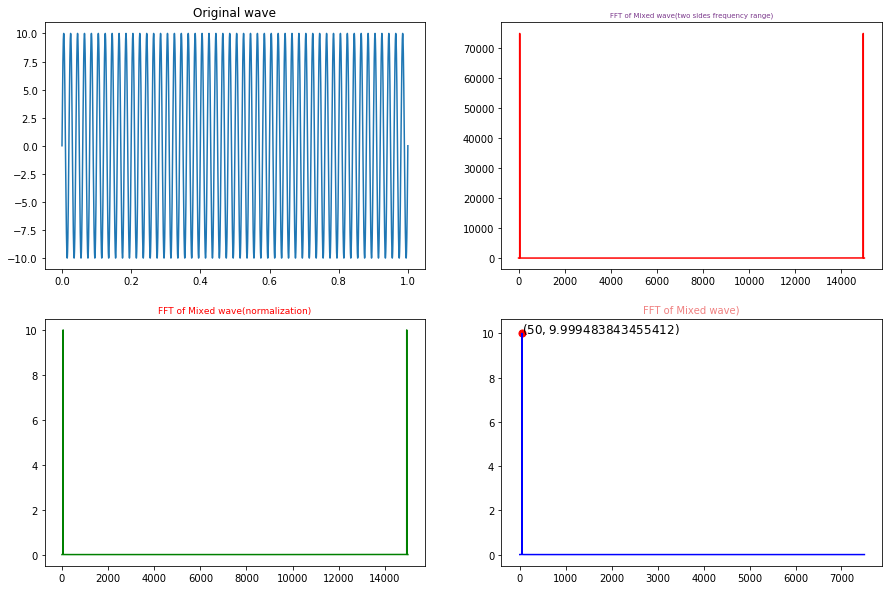

In [8]:
plt.figure(facecolor='white',figsize=(15,10))
plt.subplot(221)
plt.plot(x,y)
plt.title('Original wave')
 
plt.subplot(222)
plt.plot(xf,yf,'r')
plt.title('FFT of Mixed wave(two sides frequency range)',fontsize=7,color='#7A378B') #注意這裡的顏色可以查詢顏色程式碼表
 
plt.subplot(223)
plt.plot(xf1,yf1,'g')
plt.title('FFT of Mixed wave(normalization)',fontsize=9,color='r')
 
plt.subplot(224)
plt.plot(xf2,yf2,'b')
plt.scatter(xf2[point],yf2[point],s=50,color='r')
plt.annotate(r'$({},{})$'.format(xf2[point],yf2[point]),xy=(xf2[point],yf2[point]),xycoords='data',fontsize=12)

plt.title('FFT of Mixed wave)',fontsize=10,color='#F08080')
 
 
plt.show()